In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [4]:
df = pd.get_dummies(df, columns=["Sex", "BP", "Cholesterol"], dtype=int)

In [5]:
df

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


In [6]:
df = df.sample(frac=1)

df_train = df[:160]
df_test = df[160:]

df_train_att = df_train.drop(["Drug"], axis=1)
df_train_drug = df_train["Drug"]

df_test_att = df_test.drop(["Drug"], axis=1)
df_test_drug = df_test["Drug"]

df_att = df.drop(["Drug"], axis=1)
df_drug = df["Drug"]

In [7]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(df_train_att, df_train_drug)

In [8]:
df["Drug"].unique()

array(['drugX', 'drugY', 'drugA', 'drugB', 'drugC'], dtype=object)

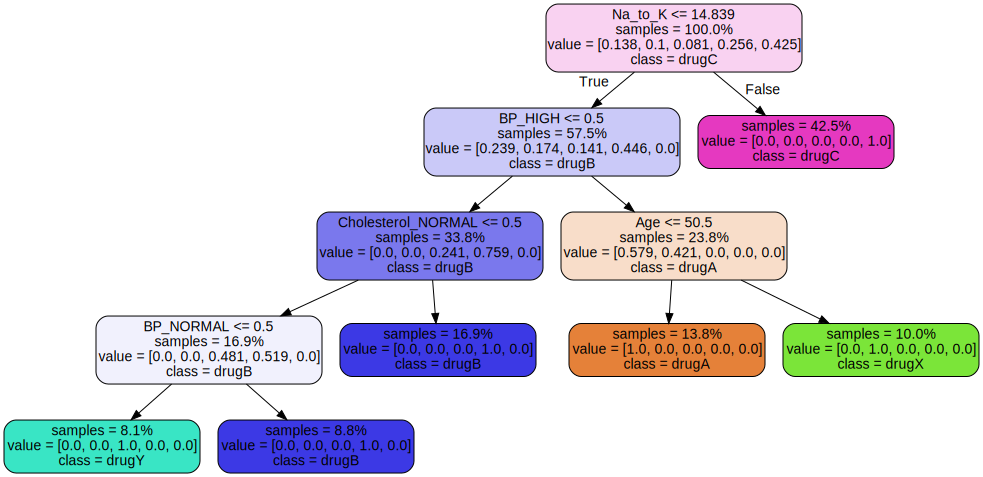

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True, feature_names=list(df_train_att), class_names=['drugA', 'drugX', 'drugY', 'drugB', 'drugC'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph 

In [10]:
t.score(df_test_att,df_test_drug)

1.0

In [11]:
#cross verify 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(t, df_att, df_drug, cv=5)
print(f"accuracy: {scores.mean()}")

accuracy: 0.99


In [12]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores=cross_val_score(t, df_att, df_drug, cv=5)
    print(f"max depth= {max_depth}, accuracy= {scores.mean()}")

max depth= 1, accuracy= 0.72
max depth= 2, accuracy= 0.835
max depth= 3, accuracy= 0.89
max depth= 4, accuracy= 0.99
max depth= 5, accuracy= 0.99
max depth= 6, accuracy= 0.99
max depth= 7, accuracy= 0.99
max depth= 8, accuracy= 0.99
max depth= 9, accuracy= 0.99
max depth= 10, accuracy= 0.99
max depth= 11, accuracy= 0.99
max depth= 12, accuracy= 0.99
max depth= 13, accuracy= 0.99
max depth= 14, accuracy= 0.99
max depth= 15, accuracy= 0.99
max depth= 16, accuracy= 0.99
max depth= 17, accuracy= 0.99
max depth= 18, accuracy= 0.99
max depth= 19, accuracy= 0.99


In [13]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
t = t.fit(df_train_att, df_train_drug)

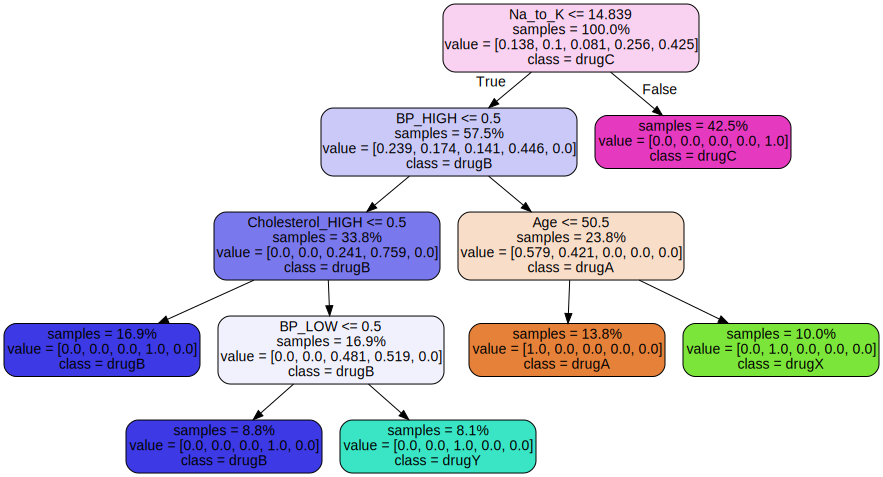

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True, feature_names=list(df_train_att), class_names=['drugA', 'drugX', 'drugY', 'drugB', 'drugC'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph 

In [17]:
import numpy as np
depth_acc = np.empty((19,3), float)
i = 0 
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(t, df_att, df_drug, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i+=1
depth_acc

array([[ 1.       ,  0.72     ,  0.02     ],
       [ 2.       ,  0.835    ,  0.0244949],
       [ 3.       ,  0.89     ,  0.0678233],
       [ 4.       ,  0.99     ,  0.0244949],
       [ 5.       ,  0.99     ,  0.0244949],
       [ 6.       ,  0.99     ,  0.0244949],
       [ 7.       ,  0.99     ,  0.0244949],
       [ 8.       ,  0.99     ,  0.0244949],
       [ 9.       ,  0.99     ,  0.0244949],
       [10.       ,  0.99     ,  0.0244949],
       [11.       ,  0.99     ,  0.0244949],
       [12.       ,  0.99     ,  0.0244949],
       [13.       ,  0.99     ,  0.0244949],
       [14.       ,  0.99     ,  0.0244949],
       [15.       ,  0.99     ,  0.0244949],
       [16.       ,  0.99     ,  0.0244949],
       [17.       ,  0.99     ,  0.0244949],
       [18.       ,  0.99     ,  0.0244949],
       [19.       ,  0.99     ,  0.0244949]])

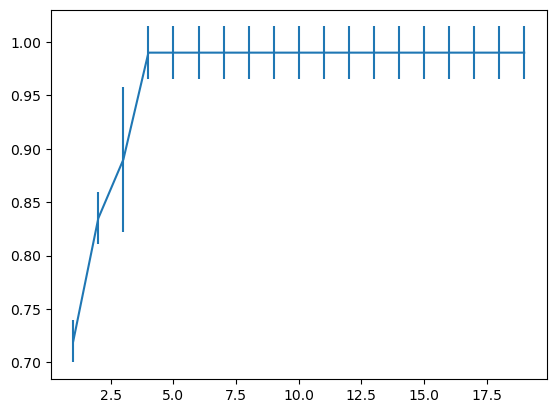

In [19]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()